In [1]:
# Importing packages
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from datetime import datetime, timedelta
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
import pandas as pd
from datetime import date, timedelta
import urllib.request
import os
import sqlite3
from pathlib import Path


In [2]:
#load traffic data for 2021

mta_2021 = pd.read_csv("./all_traffic_2021.csv")
mta_2021.head()

,STATION_FULL,WEEK,TRAFFIC
0,103_ST_CORONA_Line_7,1,122248
1,103_ST_CORONA_Line_7,2,123074
2,103_ST_CORONA_Line_7,3,121226
3,103_ST_CORONA_Line_7,4,115263
4,103_ST_CORONA_Line_7,5,104809


In [3]:
#remove the first week of data in order to match with 2019 data 
mta_2021= mta_2021[mta_2021.WEEK != 1]
mta_2021.head()

,STATION_FULL,WEEK,TRAFFIC
1,103_ST_CORONA_Line_7,2,123074
2,103_ST_CORONA_Line_7,3,121226
3,103_ST_CORONA_Line_7,4,115263
4,103_ST_CORONA_Line_7,5,104809
5,103_ST_CORONA_Line_7,6,124399


In [4]:
#get average across all stations

avg_2021 = mta_2021.groupby("WEEK").mean("TRAFFIC").reset_index()
avg_2021["STATION"] = "2021"
avg_2021.head()

,WEEK,TRAFFIC,STATION
0,2,41797.190776,2021
1,3,40184.467505,2021
2,4,40524.402516,2021
3,5,36325.809224,2021
4,6,43148.970650,2021


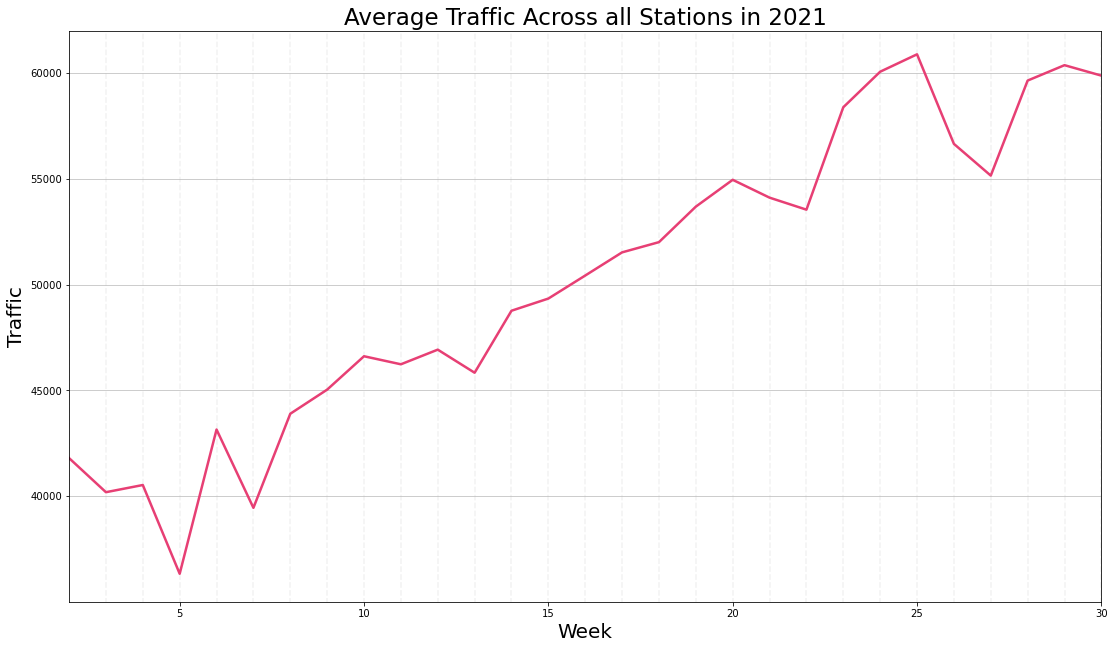

In [5]:
#GRAPH ALL TRAFFIC AVERAGE 2021


#make the figure

fig = plt.figure() # Creates a new figure
fig.suptitle
fig.set_size_inches(18.5, 10.5)
#create the subplot
ax = fig.add_subplot(111)


#set the style




#create custom palette
seq = ["#E68310", "#11A579", "#7F3C8D",  "#E73F74" ]
seqPalette = sns.set_palette(sns.color_palette(seq))




plot_2021 = sns.lineplot(data=avg_2021, x = "WEEK", y = "TRAFFIC", color = "#E73F74", linewidth=2.5, alpha = 1).set_title("Average Traffic Across all Stations in 2021", fontsize = 23)


plt.xlabel("Week", fontsize = 20)
plt.ylabel("Traffic", fontsize = 20)
plt.xlim(2, 30)
plt.ylim(35000, 62000)
plt.xticks(ticks = ( list(range(5,31,5))))
plt.yticks(ticks = (list(range(40000,65000,5000))))
plt.hlines(y = (list(range(30000,65000,5000))), xmin = 2, xmax= 30, linestyles = "solid", alpha = 0.7, color = "#737373", linewidth=0.5)
plt.vlines(x = (list(range(2,31,1))), ymin =30000, ymax =65000, linestyles = "dashed", alpha = 0.2, color = "#bdbdbd")





plt.show()

In [6]:
#upload 2019 data 
mta_2019 = pd.read_csv("./all_traffic_2019.csv")
mta_2019.head()

,STATION_FULL,WEEK,TRAFFIC
0,103_ST_CORONA_Line_7,2,210264
1,103_ST_CORONA_Line_7,3,208108
2,103_ST_CORONA_Line_7,4,191701
3,103_ST_CORONA_Line_7,5,204855
4,103_ST_CORONA_Line_7,6,215747


In [7]:
#get average across all stations

avg_2019 = mta_2019.groupby("WEEK").mean("TRAFFIC").reset_index()
avg_2019["STATION"] = "2019"
avg_2019.head()

,WEEK,TRAFFIC,STATION
0,2,125855.382353,2019
1,3,125422.191176,2019
2,4,114158.398323,2019
3,5,124484.943396,2019
4,6,131055.735849,2019


In [8]:
#create one df with both 2021 and 2019 

mta_all = pd.concat([avg_2021, avg_2019])
mta_all.head()

,WEEK,TRAFFIC,STATION
0,2,41797.190776,2021
1,3,40184.467505,2021
2,4,40524.402516,2021
3,5,36325.809224,2021
4,6,43148.970650,2021


In [9]:
# add a percentage column to 2021 data 
mta_percent = pd.merge(avg_2021,avg_2019, on="WEEK")
mta_percent.head()

,WEEK,TRAFFIC_x,STATION_x,TRAFFIC_y,STATION_y
0,2,41797.190776,2021,125855.382353,2019
1,3,40184.467505,2021,125422.191176,2019
2,4,40524.402516,2021,114158.398323,2019
3,5,36325.809224,2021,124484.943396,2019
4,6,43148.970650,2021,131055.735849,2019


In [10]:
#get average percent for all stations in 2021 compared to 2019

mta_percent["PERCENT"] = mta_percent["TRAFFIC_x"] / mta_percent["TRAFFIC_y"]*100
mta_percent.head()

,WEEK,TRAFFIC_x,STATION_x,TRAFFIC_y,STATION_y,PERCENT
0,2,41797.190776,2021,125855.382353,2019,33.210491
1,3,40184.467505,2021,125422.191176,2019,32.039360
2,4,40524.402516,2021,114158.398323,2019,35.498398
3,5,36325.809224,2021,124484.943396,2019,29.180886
4,6,43148.970650,2021,131055.735849,2019,32.924137


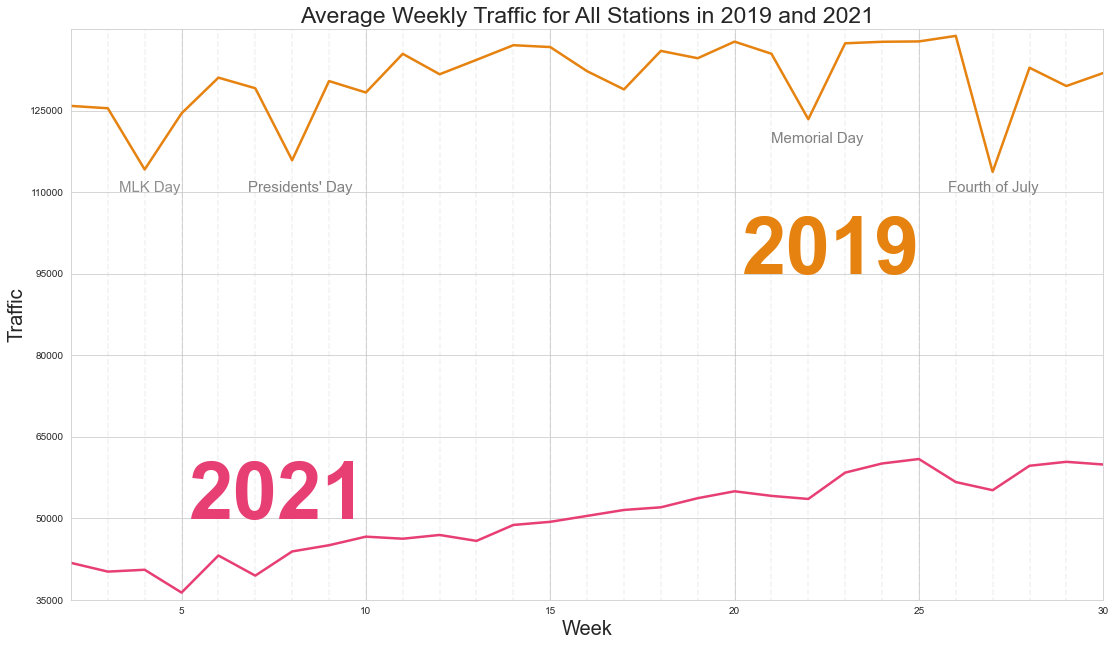

In [11]:
#GRAPH ALL TRAFFIC AVERAGE 2021

sns.set_style("whitegrid")


#make the figure

fig = plt.figure() # Creates a new figure
fig.set_size_inches(18.5, 10.5)



#create custom palette
seq = [ "#E73F74",  "#E68310",  "#7F3C8D", "#11A579"]
seqPalette = sns.set_palette(sns.color_palette(seq))

#set the style
csfont = {'fontname':'Monsterrat'}
hfont = {'fontname':'Monsterrat'}
rc = {
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Monsterrat',
      'font.size' : 15}


#create the subplot
ax = fig.add_subplot(111)


all_plot = sns.lineplot(data=mta_all, x = "WEEK", y = "TRAFFIC", hue = "STATION",  linewidth=2.5, legend = None).set_title("Average Weekly Traffic for All Stations in 2019 and 2021", fontsize=23)
plt.xlabel("Week")
plt.ylabel("Total Traffic")




plt.xlabel("Week", fontsize = 20)
plt.ylabel("Traffic", fontsize = 20)
plt.xlim(2, 30)
plt.ylim(35000, 140000)
plt.xticks(ticks = ( list(range(5,31,5))))
plt.yticks(ticks = (list(range(35000,140000,15000))))
plt.text(5.2,50000, "2021", fontsize = 80, weight = "bold", color = "#E73F74")
plt.text(20.2,95000, "2019", fontsize = 80, weight = "bold", color = "#E68310")
plt.vlines(x = (list(range(3,30,1))), ymin =30000, ymax =140000, linestyles = "dashed", alpha = 0.2, color = "#bdbdbd")
plt.text(3.3,110000, "MLK Day", fontsize=15, color = "#737373", alpha = 0.8)
plt.text(6.8,110000, "Presidents' Day", fontsize=15, color = "#737373", alpha = 0.9)
plt.text(25.8,110000, "Fourth of July", fontsize=15, color = "#737373", alpha = 0.9)
plt.text(21,119000, "Memorial Day", fontsize=15, color = "#737373", alpha = 0.9)

fig.savefig("Compare_Traffic_2021_to_2019.png")
plt.show()

In [12]:
#save average percent data for 2021 
  
mta_percent.to_csv("./all_percent_2021.csv", index=False)

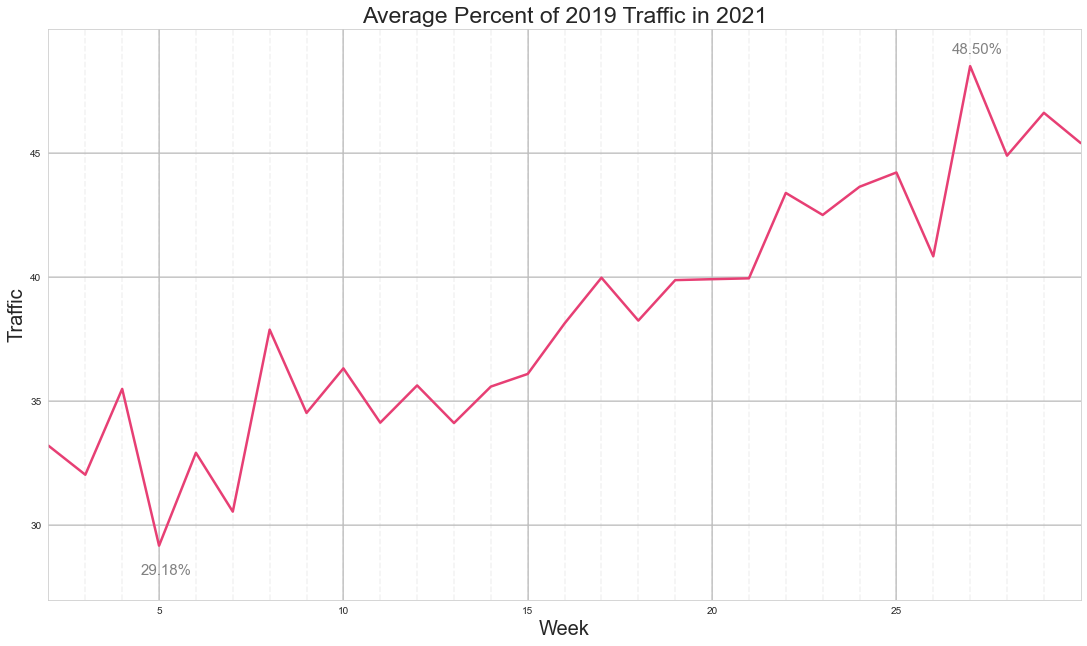

In [13]:
#GRAPH percent of 2019 traffic 

sns.set_style("whitegrid")

#make the figure

fig = plt.figure() # Creates a new figure
fig.set_size_inches(18.5, 10.5)



#create custom palette
seq = [ "#E73F74",  "#E68310",  "#7F3C8D", "#11A579"]
seqPalette = sns.set_palette(sns.color_palette(seq))

#set the style
csfont = {'fontname':'Monsterrat'}
hfont = {'fontname':'Monsterrat'}

#create the subplot
ax = fig.add_subplot(111)


percent_plot = sns.lineplot(data=mta_percent, x = "WEEK", y = "PERCENT",  linewidth=2.5, legend = None).set_title("Average Percent of 2019 Traffic in 2021", fontsize=23)
plt.xlabel("Week")
plt.ylabel("Percent")




plt.xlabel("Week", fontsize = 20)
plt.ylabel("Traffic", fontsize = 20)
plt.xlim(2, 30)
plt.ylim(27, 50)
plt.xticks(ticks = ( list(range(5,30,5))))
plt.yticks(list(range(30,49,5)))
plt.vlines(x = (list(range(3,30,1))), ymin =27, ymax =50, linestyles = "dashed", alpha = 0.2, color = "#bdbdbd")
plt.vlines(x = (list(range(5,30,5))), ymin =27, ymax =50, linestyles = "solid", alpha = 0.7, color = "#bdbdbd")
plt.hlines(y = (list(range(25,49,5))), xmin =2, xmax =30, linestyles = "solid", alpha = 0.7, color = "#bdbdbd")
plt.text(26.5,49, "48.50%", fontsize=15, color = "#737373", alpha = 0.9)
plt.text(4.5,28, "29.18%", fontsize=15, color = "#737373", alpha = 0.9)
fig.savefig("Average_percent_of_traffic.png")
plt.show()

In [14]:
#load percent data for top ten station

top_percent = pd.read_csv("./top_percent_2021_in_2019.csv", header = 2)
top_percent.tail()

,WEEK,STATION_FULL,TRAFFIC,PERCENT
294,26,PATH_NEW_WTC_Line_1_2021,346844,38.32479569331677
295,27,PATH_NEW_WTC_Line_1_2021,325212,50.414368494972706
296,28,PATH_NEW_WTC_Line_1_2021,354687,46.52151387367772
297,29,PATH_NEW_WTC_Line_1_2021,352904,47.52442180846623
298,30,PATH_NEW_WTC_Line_1_2021,381333,52.58742782438174


In [15]:
top_percent.STATION_FULL.unique()

array(['14_ST_UNION_SQ_Line_LNQR456W_2021', 'STATION_FULL',
       '34_ST_HERALD_SQ_Line_BDFMNQRW_2021',
       '34_ST_PENN_STA_Line_ACE_2021',
       '42_ST_PORT_AUTH_Line_ACENQRS1237W_2021', '86_ST_Line_456_2021',
       'FLUSHING_MAIN_Line_7_2021', 'FULTON_ST_Line_2345ACJZ_2021',
       'GRD_CNTRL_42_ST_Line_4567S_2021',
       'JKSN_HT_ROOSVLT_Line_EFMR7_2021', 'PATH_NEW_WTC_Line_1_2021'],
      dtype=object)

In [16]:
#erase columns where headers were passed as rows
top_percent  = top_percent[top_percent.STATION_FULL != 'STATION']
top_percent  = top_percent[top_percent.STATION_FULL != 'STATION_FULL']
top_percent.STATION_FULL.nunique()

10

In [17]:
top_percent.STATION_FULL.unique()

array(['14_ST_UNION_SQ_Line_LNQR456W_2021',
       '34_ST_HERALD_SQ_Line_BDFMNQRW_2021',
       '34_ST_PENN_STA_Line_ACE_2021',
       '42_ST_PORT_AUTH_Line_ACENQRS1237W_2021', '86_ST_Line_456_2021',
       'FLUSHING_MAIN_Line_7_2021', 'FULTON_ST_Line_2345ACJZ_2021',
       'GRD_CNTRL_42_ST_Line_4567S_2021',
       'JKSN_HT_ROOSVLT_Line_EFMR7_2021', 'PATH_NEW_WTC_Line_1_2021'],
      dtype=object)

In [18]:
#checking percent datatype 
top_percent.dtypes

WEEK            object
STATION_FULL    object
TRAFFIC         object
PERCENT         object
dtype: object

In [19]:
#change dtypes to approproate categories

top_percent = top_percent.astype({"TRAFFIC": float, "PERCENT": float, "WEEK": int})

In [20]:
#checking ratios for sanity
top_percent["PERCENT"].describe()


count    290.000000
mean      35.601553
std        9.545732
min       16.419056
25%       27.701972
50%       34.992850
75%       42.007639
max       57.562109
Name: PERCENT, dtype: float64

In [24]:
#load 2021 average 

mta_2021 = pd.read_csv("all_percent_2021.csv")
mta_2021.head()


,WEEK,TRAFFIC_x,STATION_x,TRAFFIC_y,STATION_y,PERCENT
0,2,41797.190776,2021,125855.382353,2019,33.210491
1,3,40184.467505,2021,125422.191176,2019,32.039360
2,4,40524.402516,2021,114158.398323,2019,35.498398
3,5,36325.809224,2021,124484.943396,2019,29.180886
4,6,43148.970650,2021,131055.735849,2019,32.924137


In [25]:
#get week 30 percent average for all stations 

mta_2021_30 = mta_2021[mta_2021["WEEK"]== 30]
mta_2021_30

,WEEK,TRAFFIC_x,STATION_x,TRAFFIC_y,STATION_y,PERCENT
28,30,59890.194561,2021,131908.874477,2019,45.402703


In [29]:
#get top stations whose percent is above station average 

week_30 = (top_percent[top_percent["WEEK"] == 30])
top_4_percent = week_30[week_30["PERCENT"] > 45.402703].sort_values("PERCENT", ascending = False).reset_index(drop=True)
top_4_percent

,WEEK,STATION_FULL,TRAFFIC,PERCENT
0,30,FLUSHING_MAIN_Line_7_2021,363942.0,55.141474
1,30,JKSN_HT_ROOSVLT_Line_EFMR7_2021,290320.0,54.872609
2,30,PATH_NEW_WTC_Line_1_2021,381333.0,52.587428
3,30,86_ST_Line_456_2021,255142.0,49.703794


In [30]:
top_4_per_list = top_4_percent["STATION_FULL"]
top_4_per_list

0          FLUSHING_MAIN_Line_7_2021
1    JKSN_HT_ROOSVLT_Line_EFMR7_2021
2           PATH_NEW_WTC_Line_1_2021
3                86_ST_Line_456_2021
Name: STATION_FULL, dtype: object

In [31]:
#make a df of top 4 percent

top_4_percent_df = top_percent[top_percent["STATION_FULL"].isin(top_4_per_list)]
top_4_percent_df.head()

,WEEK,STATION_FULL,TRAFFIC,PERCENT
120,2,86_ST_Line_456_2021,186558.0,37.268145
121,3,86_ST_Line_456_2021,184041.0,37.512994
122,4,86_ST_Line_456_2021,184129.0,40.793272
123,5,86_ST_Line_456_2021,156230.0,32.465333
124,6,86_ST_Line_456_2021,178663.0,35.315454


In [32]:
#make df of the rest of the stations in the bottom percent bracket

week_30 = (top_percent["WEEK"] == 30)
bottom_percent = top_percent[week_30].sort_values("PERCENT", ascending = False).tail(6)

#make a list of station names in the bottom percent group
bottom_percent_list = bottom_percent["STATION_FULL"]
bottom_percent_list

88               34_ST_PENN_STA_Line_ACE_2021
118    42_ST_PORT_AUTH_Line_ACENQRS1237W_2021
58         34_ST_HERALD_SQ_Line_BDFMNQRW_2021
238           GRD_CNTRL_42_ST_Line_4567S_2021
28          14_ST_UNION_SQ_Line_LNQR456W_2021
208              FULTON_ST_Line_2345ACJZ_2021
Name: STATION_FULL, dtype: object

In [33]:
#make a df of bottom percent 

bottom_6_percent_df = top_percent[top_percent["STATION_FULL"].isin(bottom_percent_list)]
bottom_6_percent_df.head()

,WEEK,STATION_FULL,TRAFFIC,PERCENT
0,2,14_ST_UNION_SQ_Line_LNQR456W_2021,177299.0,23.199691
1,3,14_ST_UNION_SQ_Line_LNQR456W_2021,171502.0,23.059744
2,4,14_ST_UNION_SQ_Line_LNQR456W_2021,170188.0,23.435514
3,5,14_ST_UNION_SQ_Line_LNQR456W_2021,152808.0,20.223532
4,6,14_ST_UNION_SQ_Line_LNQR456W_2021,182246.0,23.024115


In [34]:
#see percentages for week 30 in the bottom percent df 
bottom_6_percent_df[bottom_6_percent_df["WEEK"] == 30].sort_values("PERCENT")

,WEEK,STATION_FULL,TRAFFIC,PERCENT
208,30,FULTON_ST_Line_2345ACJZ_2021,256336.0,34.146991
28,30,14_ST_UNION_SQ_Line_LNQR456W_2021,295786.0,35.246061
238,30,GRD_CNTRL_42_ST_Line_4567S_2021,623895.0,36.435314
58,30,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,540967.0,38.078730
118,30,42_ST_PORT_AUTH_Line_ACENQRS1237W_2021,414967.0,41.140016
88,30,34_ST_PENN_STA_Line_ACE_2021,390287.0,41.203764


In [35]:
#get top 5 by foot traffic 

week_30 = (top_percent["WEEK"] == 30)
top_5_traffic = top_percent[week_30].sort_values("TRAFFIC", ascending = False).head(5)
top_5_list = top_5_traffic["STATION_FULL"].unique()
top_5_list


array(['GRD_CNTRL_42_ST_Line_4567S_2021',
       '34_ST_HERALD_SQ_Line_BDFMNQRW_2021',
       '42_ST_PORT_AUTH_Line_ACENQRS1237W_2021',
       '34_ST_PENN_STA_Line_ACE_2021', 'PATH_NEW_WTC_Line_1_2021'],
      dtype=object)

In [36]:
#make a df of top 5 traffic

top_traffic = top_percent[top_percent["STATION_FULL"].isin(top_5_list)].reset_index(drop=True)
top_traffic.head()

,WEEK,STATION_FULL,TRAFFIC,PERCENT
0,2,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,355961.0,25.900901
1,3,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,339523.0,25.207081
2,4,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,334801.0,26.566511
3,5,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,282419.0,21.289464
4,6,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,370934.0,26.986773


In [37]:
#see traffic data for week 30 in top 5 traffic df 

top_traffic[top_traffic["WEEK"] == 30].sort_values("TRAFFIC", ascending = False)

,WEEK,STATION_FULL,TRAFFIC,PERCENT
115,30,GRD_CNTRL_42_ST_Line_4567S_2021,623895.0,36.435314
28,30,34_ST_HERALD_SQ_Line_BDFMNQRW_2021,540967.0,38.078730
86,30,42_ST_PORT_AUTH_Line_ACENQRS1237W_2021,414967.0,41.140016
57,30,34_ST_PENN_STA_Line_ACE_2021,390287.0,41.203764
144,30,PATH_NEW_WTC_Line_1_2021,381333.0,52.587428


In [38]:
#get bottom 5 by foot traffic 

week_30 = (top_percent["WEEK"] == 30)
bottom_5_traffic = top_percent[week_30].sort_values("TRAFFIC", ascending = True).head(5)
bottom_5_list = bottom_5_traffic["STATION_FULL"].unique()
bottom_5_list

array(['86_ST_Line_456_2021', 'FULTON_ST_Line_2345ACJZ_2021',
       'JKSN_HT_ROOSVLT_Line_EFMR7_2021',
       '14_ST_UNION_SQ_Line_LNQR456W_2021', 'FLUSHING_MAIN_Line_7_2021'],
      dtype=object)

In [39]:
#make bottom traffic list 

bottom_traffic = top_percent[top_percent["STATION_FULL"].isin(bottom_5_list)].reset_index(drop=True)
bottom_traffic.head()

,WEEK,STATION_FULL,TRAFFIC,PERCENT
0,2,14_ST_UNION_SQ_Line_LNQR456W_2021,177299.0,23.199691
1,3,14_ST_UNION_SQ_Line_LNQR456W_2021,171502.0,23.059744
2,4,14_ST_UNION_SQ_Line_LNQR456W_2021,170188.0,23.435514
3,5,14_ST_UNION_SQ_Line_LNQR456W_2021,152808.0,20.223532
4,6,14_ST_UNION_SQ_Line_LNQR456W_2021,182246.0,23.024115


In [40]:
#get week 30 values for bottom traffic df

bottom_traffic[bottom_traffic["WEEK"] == 30].sort_values("TRAFFIC")

,WEEK,STATION_FULL,TRAFFIC,PERCENT
57,30,86_ST_Line_456_2021,255142.0,49.703794
115,30,FULTON_ST_Line_2345ACJZ_2021,256336.0,34.146991
144,30,JKSN_HT_ROOSVLT_Line_EFMR7_2021,290320.0,54.872609
28,30,14_ST_UNION_SQ_Line_LNQR456W_2021,295786.0,35.246061
86,30,FLUSHING_MAIN_Line_7_2021,363942.0,55.141474


In [41]:
#find any stations whose percentage is above the average for 2021 and in the top 5 
#for foot traffic for 2021
overlap = pd.merge(top_4_percent, top_5_traffic, on="STATION_FULL")
overlap

,WEEK_x,STATION_FULL,TRAFFIC_x,PERCENT_x,WEEK_y,TRAFFIC_y,PERCENT_y
0,30,PATH_NEW_WTC_Line_1_2021,381333.0,52.587428,30,381333.0,52.587428


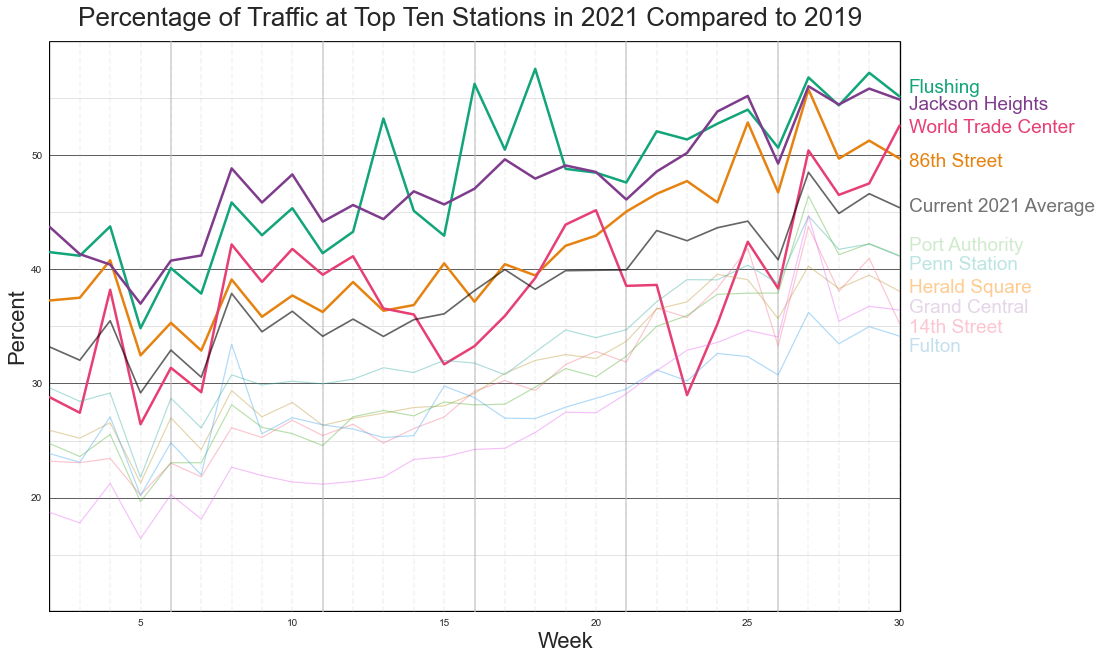

In [42]:
#make the figure for percentage data 

fig = plt.figure() # Creates a new figure

#create the subplot
ax = fig.add_subplot(111)
ax.grid(False)
fig.set_size_inches(18.5, 10.5)

#set the style

csfont = {'fontname':'Monsterrat'}
hfont = {'fontname':'Monsterrat'}
rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Monsterrat',
      'font.size' : 15}
sns.despine(bottom = True, left = True)



#create custom palette
seq = ["#E68310", "#11A579", "#7F3C8D",  "#E73F74" ]
seqPalette = sns.set_palette(sns.color_palette(seq))




top_plot = sns.lineplot(data=top_4_percent_df, x = "WEEK",y="PERCENT", hue = "STATION_FULL", linewidth=2.5, alpha = 1, palette=seqPalette).set_title("    Percentage of Traffic at Top Ten Stations in 2021 Compared to 2019", fontsize = 26, pad=15, loc="left")
average_plot = sns.lineplot(data=mta_2021, x="WEEK", y="PERCENT", alpha =0.6, linewidth=1.7, color="BLACK")
bottom_plot = sns.lineplot(data=bottom_6_percent_df, x = "WEEK", y = "PERCENT", hue = "STATION_FULL", linewidth=1.2, alpha = 0.4)

plt.xlabel("Week", fontsize = 22)
plt.ylabel("Percent", fontsize = 22)
plt.hlines(y = (10.1,60), xmin = 2, xmax= 30, linestyles = "solid", alpha = 1, color = "#000000", linewidth=1.3)
plt.hlines(y = (list(range(15,65,5))), xmin = 2, xmax= 30, linestyles = "solid", alpha = 0.4, color = "#737373", linewidth=0.5)
plt.hlines(y = (list(range(10,60,10))), xmin = 2, xmax= 30, linestyles = "solid", alpha = 1, color = "#525252", linewidth=0.9)
plt.vlines(x = (list(range(1,31,1))), ymin =10, ymax =60, linestyles = "dashed", alpha = 0.2, color = "#bdbdbd")
plt.vlines(x = (list(range(1,31,5))), ymin =10, ymax =60, linestyles = "solid", alpha = 0.7, color = "#bdbdbd")
plt.vlines(x=(2,30), ymin =10, ymax=60, linestyles = "solid", alpha = 1, color = "#000000", linewidth=1.3)
plt.xlim(2, 36)
plt.ylim(10, 60)
ax.get_legend().remove()
plt.text(30.3,49, "86th Street", fontsize = 19, color = "#E68310")
plt.text(30.3,52, "World Trade Center", fontsize = 19,  color = "#E73F74")
plt.text(30.3,54, "Jackson Heights", fontsize = 19, color = "#7F3C8D")
plt.text(30.3,55.5, "Flushing", fontsize = 19,  color = "#11A579")
plt.text(30.3,32.8, "Fulton", fontsize = 19,  color = "#9ecae1", alpha = 0.6)
plt.text(30.3,34.4, "14th Street", fontsize = 19,  color = "#fa9fb5", alpha = 0.6)
plt.text(30.3,36.2, "Grand Central", fontsize = 19,  color = "#d4b9da", alpha = 0.6)
plt.text(30.3,37.9, "Herald Square", fontsize = 19,  color = "#fe9929", alpha = 0.5)
plt.text(30.3,40, "Penn Station", fontsize = 19,  color = "#7bccc4", alpha = 0.5)
plt.text(30.3,41.6, "Port Authority", fontsize = 19,  color = "#a1d99b", alpha = 0.5)
plt.text(30.3,45, "Current 2021 Average", fontsize = 19,  color = "#737373", alpha = 1)
plt.xticks(ticks = (list(range(5,31,5))))
plt.yticks(ticks = (list(range(20,60,10))))
fig.savefig('Percent_2019_and_2021.png')
plt.show()



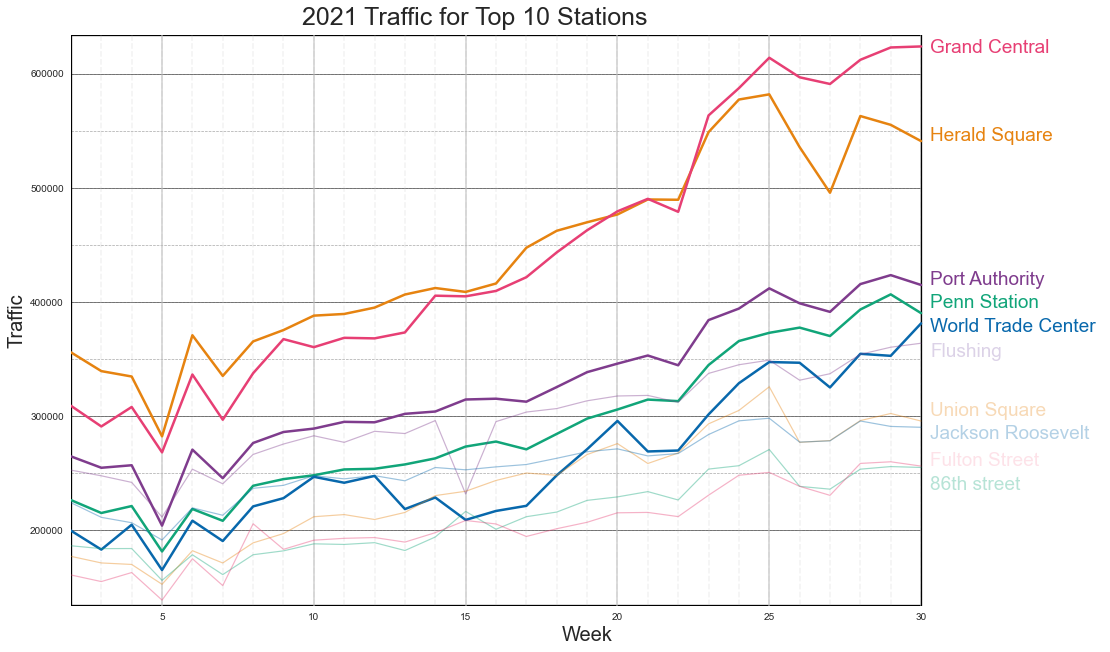

In [43]:
#make the figure for traffic data 

fig = plt.figure() # Creates a new figure

fig.set_size_inches(18.5, 10.5)
#create the subplot
ax = fig.add_subplot(111)
ax.grid(False)

#set the style
csfont = {'fontname':'Monsterrat'}
hfont = {'fontname':'Monsterrat'}
rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Monsterrat',
      'font.size' : 15}
sns.despine(bottom = True, left = True)
#create custom palette
seq = ["#E68310", "#11A579", "#7F3C8D",  "#E73F74", "#0868ac" ]
seqPalette = sns.set_palette(sns.color_palette(seq))


top_plot = sns.lineplot(data=top_traffic, x = "WEEK",y="TRAFFIC", hue = "STATION_FULL", linewidth=2.5, alpha = 1, palette=seqPalette).set_title("                                 2021 Traffic for Top 10 Stations", fontsize = 25, pad = 10, loc="left")
bottom_plot = sns.lineplot(data=bottom_traffic, x = "WEEK", y = "TRAFFIC", hue = "STATION_FULL", linewidth=1.2, alpha = 0.4,)



plt.hlines(y = (list(range(200000,610000,100000))), xmin = 2, xmax= 30, linestyles = "solid", alpha = 0.7, color = "#525252", linewidth=1)
plt.hlines(y = (list(range(200000,610000,50000))), xmin = 2, xmax= 30, linestyles = "dashed", alpha = 0.5, color = "#525252", linewidth=0.7)
plt.hlines(y = (bottom_traffic.TRAFFIC.min()-4000, top_traffic.TRAFFIC.max()+10000), xmin = 2, xmax= 30, linestyles = "solid", alpha = 1, color = "#000000", linewidth=1.3)
plt.xlabel("Week", fontsize = 20)
plt.ylabel("Traffic", fontsize = 20)
plt.xlim(2, 36)
plt.ylim(bottom_traffic.TRAFFIC.min()-5000, top_traffic.TRAFFIC.max()+10000)
plt.text(30.3,374000.0, "World Trade Center", fontsize = 19, color = "#0868ac")
plt.text(30.3,395000.0, "Penn Station", fontsize = 19,  color = "#11A579")
plt.text(30.3,414967.0, "Port Authority", fontsize = 19, color = "#7F3C8D")
plt.text(30.3,540967.0, "Herald Square", fontsize = 19,  color = "#E68310")
plt.text(30.3,617895.0, "Grand Central", fontsize = 19,  color = "#E73F74")
ax.get_legend().remove()
plt.vlines(x = (list(range(5,31,5))), ymin =100000, ymax =640000, linestyles = "solid", alpha = 0.7, color = "#bdbdbd")
plt.vlines(x = (list(range(2,31,1))), ymin =100000, ymax =640000, linestyles = "dashed", alpha = 0.2, color = "#bdbdbd")
plt.vlines(x=(2,30),ymin =100000, ymax =640000, linestyles = "solid", alpha = 1, color = "#000000", linewidth=1.3)

plt.xticks(ticks = (list(range(5,35,5))))
plt.text(30.3,235142.0, "86th street", fontsize = 19, color = "#11A579", alpha = 0.3)
plt.text(30.3,256336.0, "Fulton Street", fontsize = 19,  color = "#fa9fb5", alpha = 0.3)
plt.text(30.3,280320.0, "Jackson Roosevelt", fontsize = 19, color = "#0868ac", alpha = 0.3)
plt.text(30.3,300786.0, "Union Square", fontsize = 19,  color = "#E68310", alpha = 0.3)
plt.text(30.3,352000.0, "Flushing", fontsize = 19,  color = "#8c6bb1", alpha = 0.3)

fig.savefig('Top_Traffic_2021.png')
plt.show()

In [44]:
#save top traffic df to find starbucks locations

top_traffic.to_csv("./top_5_stations.csv", index=False)